<a href="https://colab.research.google.com/github/lianjin1014/research-project/blob/main/data_visualization_822.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [121]:
data = pd.read_excel('/content/pricehistory-dailyadj.xls')

Stock close price vs Volume analysis: compares how volume impacting stock price

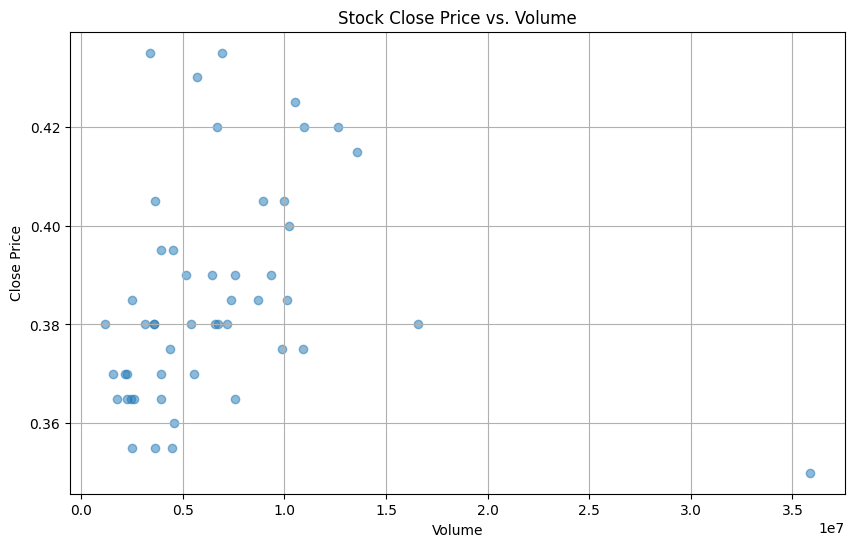

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['Volume'], data['Close'], alpha=0.5)
plt.title('Stock Close Price vs. Volume')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

Stock movement analysis: use stock chart illustrates stock price trends and detail with
open/high/low/close price

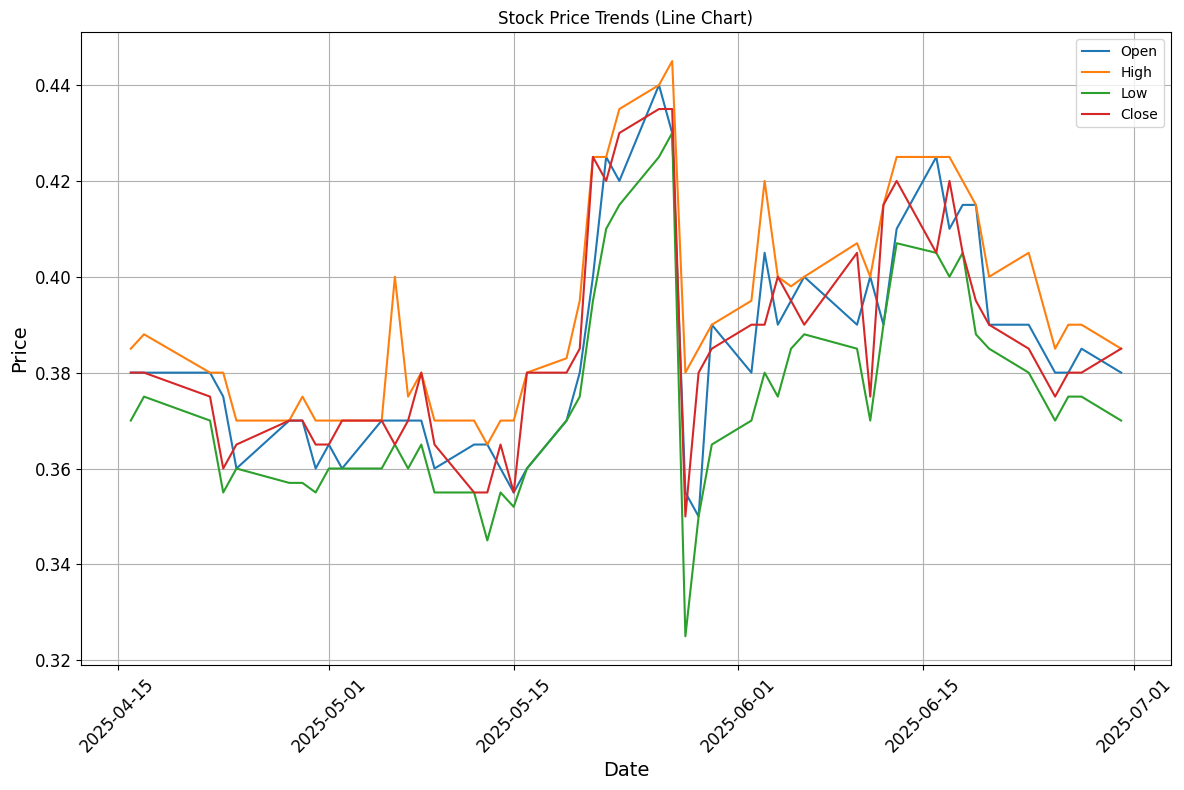

In [123]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert 'Date' column to datetime objects
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Sort data by date
data.sort_values('Date', inplace=True)

# Create the line chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(data['Date'], data['Open'], label='Open')
ax.plot(data['Date'], data['High'], label='High')
ax.plot(data['Date'], data['Low'], label='Low')
ax.plot(data['Date'], data['Close'], label='Close')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.title('Stock Price Trends (Line Chart)',fontsize=12)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Capital vs Issued shares analysis: find out how issued shares impacting capitals


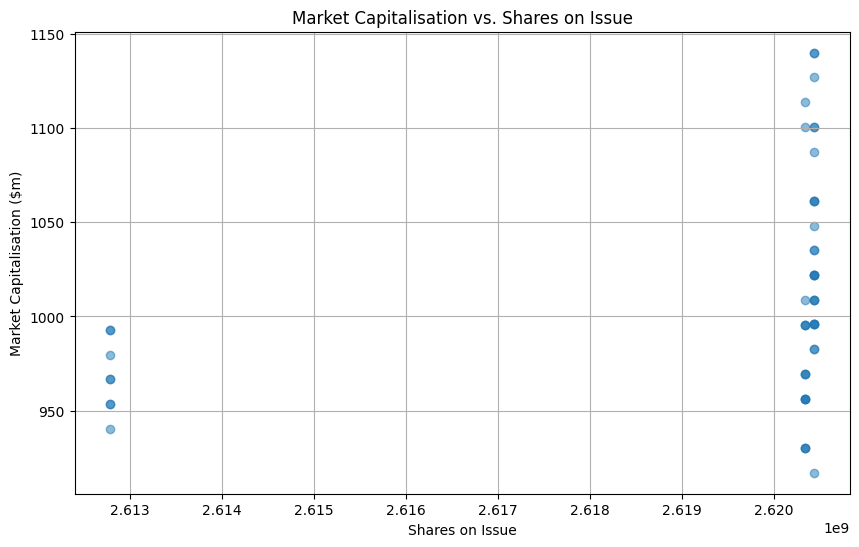

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['Shares on Issue'], data['Market Capitalisation($m)'], alpha=0.5)
plt.title('Market Capitalisation vs. Shares on Issue')
plt.xlabel('Shares on Issue')
plt.ylabel('Market Capitalisation ($m)')
plt.grid(True)
plt.show()

Dividend Yield analysis: the Yield is the important parameters values the stock price vs dividend. If your
company don't have the dividend payment, use the close price data for analysis.

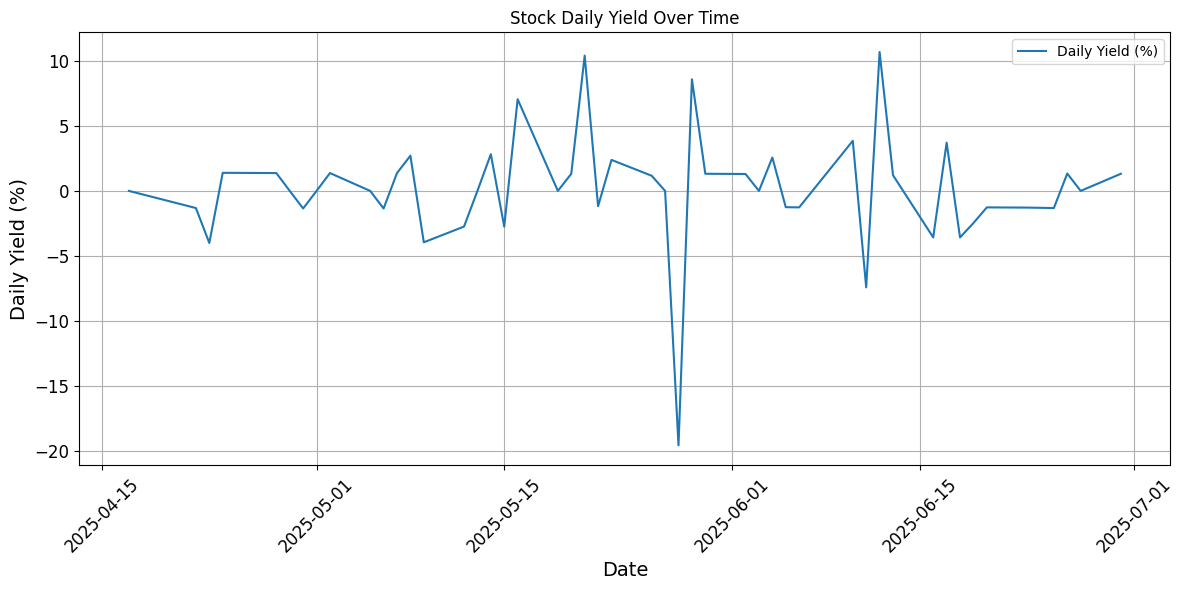

In [138]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure 'Date' column is in datetime format and sort data by date
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Calculate daily percentage change in Close price (daily yield proxy)
data['Daily Yield'] = data['Close'].pct_change() * 100 # Multiply by 100 for percentage

# Drop the first row as pct_change() will result in NaN
data.dropna(subset=['Daily Yield'], inplace=True)

# Create the line plot for Daily Yield
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data['Date'], data['Daily Yield'], label='Daily Yield (%)')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.title('Stock Daily Yield Over Time')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Daily Yield (%)', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Plot yearly yields if multiple years are present
if data['Date'].dt.year.nunique() > 1:
    years = data['Date'].dt.year.unique()
    fig, axes = plt.subplots(len(years), 1, figsize=(12, 6 * len(years)), sharex=False)
    if len(years) == 1: # Handle case with only one year
        axes = [axes]
    for i, year in enumerate(years):
        yearly_data = data[data['Date'].dt.year == year]
        axes[i].plot(yearly_data['Date'], yearly_data['Daily Yield'], label=f'Daily Yield (%) - {year}')
        axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        axes[i].tick_params(axis='x', rotation=45, labelsize=12)
        axes[i].tick_params(axis='y', labelsize=12)
        axes[i].set_ylabel('Daily Yield (%)', fontsize=14)
        axes[i].set_title(f'Stock Daily Yield Over Time - {year}')
        axes[i].grid(True)
        axes[i].legend()
    plt.tight_layout()
    plt.show()

Yearly Portfolio: put $1000 fund and buy your stock at the beginning of the year and hold it. What
portfolio will you get at the end of the year including dividend pay? Use visualisation analysis to illustrate
your portfolio analysis for 2024/2025 financial year

In [126]:
data['Date'] = pd.to_datetime(data['Date'])
portfolio_data = data[(data['Date'].dt.year == 2024) | (data['Date'].dt.year == 2025)].copy()
portfolio_data.set_index('Date', inplace=True)
display(portfolio_data.head())

,ASX Code,Company Name,Open,High,Low,Close,Volume,Market Capitalisation($m),Shares on Issue
Date,,,,,,,,,
2025-04-16,PDI,Predictive Discovery Ltd,0.380,0.385,0.370,0.380,5425646,992.86,2612778211
2025-04-17,PDI,Predictive Discovery Ltd,0.380,0.388,0.375,0.380,3560450,992.86,2612778211
2025-04-22,PDI,Predictive Discovery Ltd,0.380,0.380,0.370,0.375,4373490,979.79,2612778211
2025-04-23,PDI,Predictive Discovery Ltd,0.375,0.380,0.355,0.360,4586816,940.60,2612778211
2025-04-24,PDI,Predictive Discovery Ltd,0.360,0.370,0.360,0.365,2431664,953.66,2612778211


,ASX Code,Company Name,Open,High,Low,Close,Volume,Market Capitalisation($m),Shares on Issue,Portfolio Value
Date,,,,,,,,,,
2025-04-16,PDI,Predictive Discovery Ltd,0.380,0.385,0.370,0.380,5425646,992.86,2612778211,1000.000000
2025-04-17,PDI,Predictive Discovery Ltd,0.380,0.388,0.375,0.380,3560450,992.86,2612778211,1000.000000
2025-04-22,PDI,Predictive Discovery Ltd,0.380,0.380,0.370,0.375,4373490,979.79,2612778211,986.842105
2025-04-23,PDI,Predictive Discovery Ltd,0.375,0.380,0.355,0.360,4586816,940.60,2612778211,947.368421
2025-04-24,PDI,Predictive Discovery Ltd,0.360,0.370,0.360,0.365,2431664,953.66,2612778211,960.526316


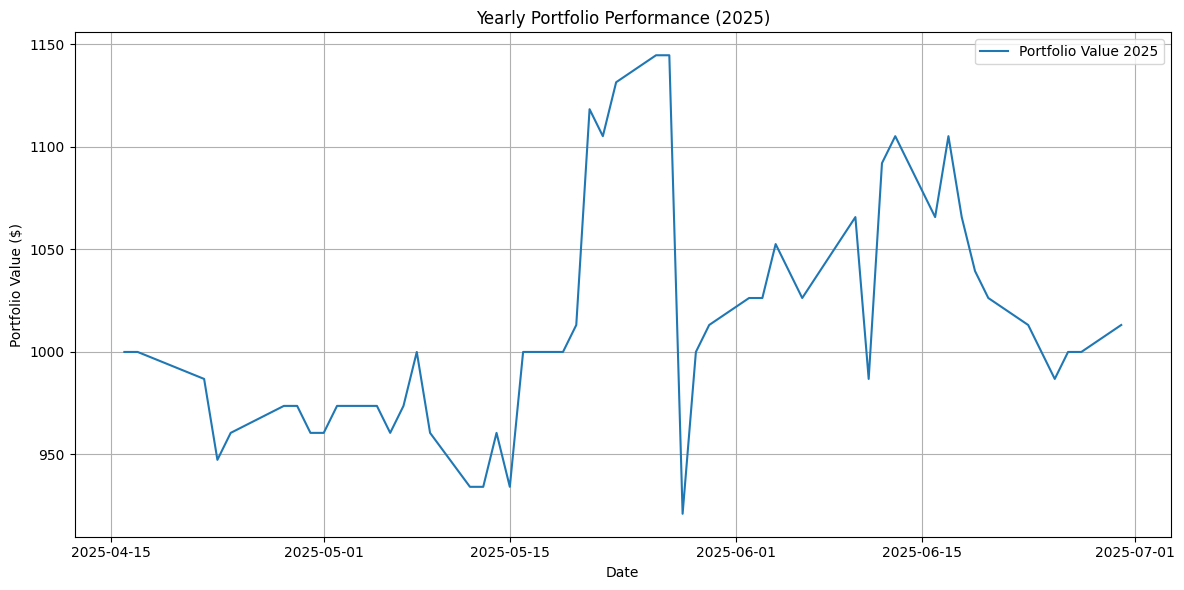

In [127]:
portfolio_2025 = portfolio_data[portfolio_data.index.year == 2025].copy()
initial_investment = 1000
first_day_close = portfolio_2025['Close'].iloc[0]
num_shares = initial_investment / first_day_close
portfolio_2025['Portfolio Value'] = num_shares * portfolio_2025['Close']
display(portfolio_2025.head())

# Since there is no data for 2024, we will only plot the 2025 portfolio value.
plt.figure(figsize=(12, 6))
plt.plot(portfolio_2025.index, portfolio_2025['Portfolio Value'], label='Portfolio Value 2025')

plt.title('Yearly Portfolio Performance (2025)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [137]:
portfolio_2025['Portfolio Value'][-1]

/tmp/ipython-input-200339199.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  portfolio_2025['Portfolio Value'][-1]


np.float64(1013.1578947368421)

A single trade for maximum profits: put $1000 fund to buy your stock share that has to make the
maximum profit in a particular time frame. You have to demonstrate it to your clients or investors it is
reasonable based on Price/Yield/PE/Volume/trend/etc visualisation and analysis


In [128]:
start_date = data['Date'].min()
end_date = data['Date'].max()
print(f"Data available from {start_date.date()} to {end_date.date()}")

Data available from 2025-04-16 to 2025-06-30


In [129]:
# Find the optimal buy and sell dates for maximum profit
max_profit = 0
buy_date = None
sell_date = None

for i in range(len(data) - 1):
    for j in range(i + 1, len(data)):
        buy_price = data['Open'].iloc[i]  # Use Open price for buying
        sell_price = data['Close'].iloc[j]
        profit = sell_price - buy_price
        if profit > max_profit:
            max_profit = profit
            buy_date = data['Date'].iloc[i]
            sell_date = data['Date'].iloc[j]

buy_price_optimal = data[data['Date'] == buy_date]['Open'].iloc[0] # Use Open price for optimal buy price
sell_price_optimal = data[data['Date'] == sell_date]['Close'].iloc[0]

print(f"Optimal Buy Date: {buy_date.date()}, Buy Price: {buy_price_optimal}")
print(f"Optimal Sell Date: {sell_date.date()}, Sell Price: {sell_price_optimal}")
print(f"Maximum potential profit per share: ${max_profit:.2f}")

Optimal Buy Date: 2025-05-15, Buy Price: 0.355
Optimal Sell Date: 2025-05-26, Sell Price: 0.435
Maximum potential profit per share: $0.08


In [130]:
num_shares_trade = initial_investment / min_price
potential_selling_value = num_shares_trade * max_price
max_profit = potential_selling_value - initial_investment

print(f"Number of shares purchased: {num_shares_trade:.2f}")
print(f"Maximum potential profit: ${max_profit:.2f}")

Number of shares purchased: 2857.14
Maximum potential profit: $242.86


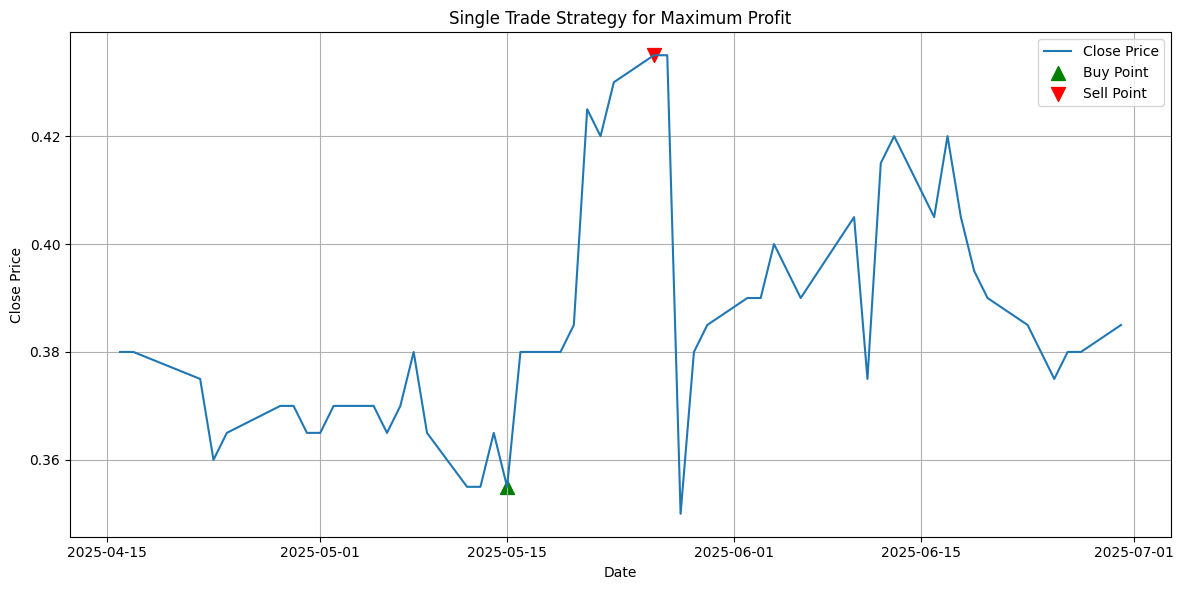

In [131]:
# Create a plot to visualize the buy and sell points
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.scatter(buy_date, buy_price_optimal, color='green', marker='^', s=100, label='Buy Point')
plt.scatter(sell_date, sell_price_optimal, color='red', marker='v', s=100, label='Sell Point')

plt.title('Single Trade Strategy for Maximum Profit')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Multiple trades for maximum profits: put $1000 fund to buy your stock share first, then sell it to make
the maximum profits in short time period. Then use all fund buy/sell your stock again to make the
maximum profit in the multiple time frame. You have to demonstrate it to your clients or investors it is
reasonable based on Price/Yield/PE/Volume/trend/etc visualisation and analysis

In [132]:
start_date = data['Date'].min()
end_date = data['Date'].max()
print(f"Data available from {start_date.date()} to {end_date.date()}")

Data available from 2025-04-16 to 2025-06-30


In [133]:
def multiple_trades_strategy(df, initial_investment):
    """
    Implements a multiple trade strategy: buy at Open price on a decrease,
    and sell at Close price on the first price decrease after buying, but not below the buy price.

    Args:
        df: DataFrame with stock data, including 'Date', 'Open', and 'Close' columns.
        initial_investment: The starting capital for trading.

    Returns:
        A list of dictionaries, each representing a trade.
    """
    trades = []
    current_funds = initial_investment
    held_shares = 0
    in_position = False
    buy_price = 0
    buy_date = None
    last_close_price = df['Close'].iloc[0] # Initialize with the first day's close

    for i in range(1, len(df)):
        current_date = df['Date'].iloc[i]
        current_open_price = df['Open'].iloc[i]
        current_close_price = df['Close'].iloc[i]


        if not in_position:
            # Buy signal: Buy at Open price if the current Close price is lower than the previous day's Close price
            if current_funds > 0 and current_close_price < last_close_price:
                buy_price = current_open_price # Buy at Open price
                buy_date = current_date
                held_shares = current_funds / buy_price
                current_funds = 0
                in_position = True
        else:
            # Sell signal: Sell at Close price on the first day where the Close price is lower than the previous day's Close,
            # but only if the selling price is not less than the buy price.
            if current_close_price < last_close_price and current_close_price >= buy_price:
                sell_price = current_close_price # Sell at Close price
                sell_date = current_date
                current_funds = held_shares * sell_price
                trades.append({
                    'buy_date': buy_date,
                    'buy_price': buy_price,
                    'sell_date': sell_date,
                    'sell_price': sell_price,
                    'profit': (sell_price - buy_price) * (initial_investment / buy_price) # Calculate profit for this trade
                })
                held_shares = 0
                in_position = False
                buy_price = 0
                buy_date = None

        last_close_price = current_close_price # Update last_close_price for the next iteration


    # If holding shares at the end of the period, sell them at the last Close price
    # This final sell can be at a loss if the price ended below the buy price
    if in_position:
        sell_price = current_close_price
        sell_date = current_date
        current_funds = held_shares * sell_price
        trades.append({
            'buy_date': buy_date,
            'buy_price': buy_price,
            'sell_date': sell_date,
            'sell_price': sell_price,
            'profit': (sell_price - buy_price) * (initial_investment / buy_price) # Calculate profit for this trade
        })

    return trades

# Apply the strategy to the data
multiple_trades = multiple_trades_strategy(data.reset_index(), initial_investment)

# Print the identified trades
for trade in multiple_trades:
    print(trade)

{'buy_date': Timestamp('2025-04-22 00:00:00'), 'buy_price': np.float64(0.38), 'sell_date': Timestamp('2025-05-22 00:00:00'), 'sell_price': np.float64(0.42), 'profit': np.float64(105.26315789473678)}
{'buy_date': Timestamp('2025-05-28 00:00:00'), 'buy_price': np.float64(0.355), 'sell_date': Timestamp('2025-06-05 00:00:00'), 'sell_price': np.float64(0.395), 'profit': np.float64(112.67605633802827)}
{'buy_date': Timestamp('2025-06-06 00:00:00'), 'buy_price': np.float64(0.4), 'sell_date': Timestamp('2025-06-16 00:00:00'), 'sell_price': np.float64(0.405), 'profit': np.float64(12.50000000000001)}
{'buy_date': Timestamp('2025-06-18 00:00:00'), 'buy_price': np.float64(0.415), 'sell_date': Timestamp('2025-06-30 00:00:00'), 'sell_price': np.float64(0.385), 'profit': np.float64(-72.28915662650596)}


**Reasoning**:
Simulate the multiple trades based on the defined strategy, updating the current funds and held shares, and recording each trade.



In [134]:
portfolio_value_over_time = []
current_funds = initial_investment
held_shares = 0
trade_index = 0  # To keep track of the current trade in the multiple_trades list

for i in range(len(data)):
    current_date = data['Date'].iloc[i]
    current_price = data['Close'].iloc[i]

    # Check if there is a trade to execute on the current date
    if trade_index < len(multiple_trades):
        current_trade = multiple_trades[trade_index]

        # Check for buy date
        if current_date == current_trade['buy_date']:
            held_shares = current_funds / current_trade['buy_price']
            current_funds = 0
            in_position = True

        # Check for sell date
        if current_date == current_trade['sell_date']:
            current_funds = held_shares * current_trade['sell_price']
            held_shares = 0
            in_position = False
            trade_index += 1 # Move to the next trade

    # Calculate current portfolio value
    if in_position:
        current_portfolio_value = held_shares * current_price
    else:
        current_portfolio_value = current_funds

    portfolio_value_over_time.append(current_portfolio_value)

# The portfolio_value_over_time list now contains the portfolio value at each date

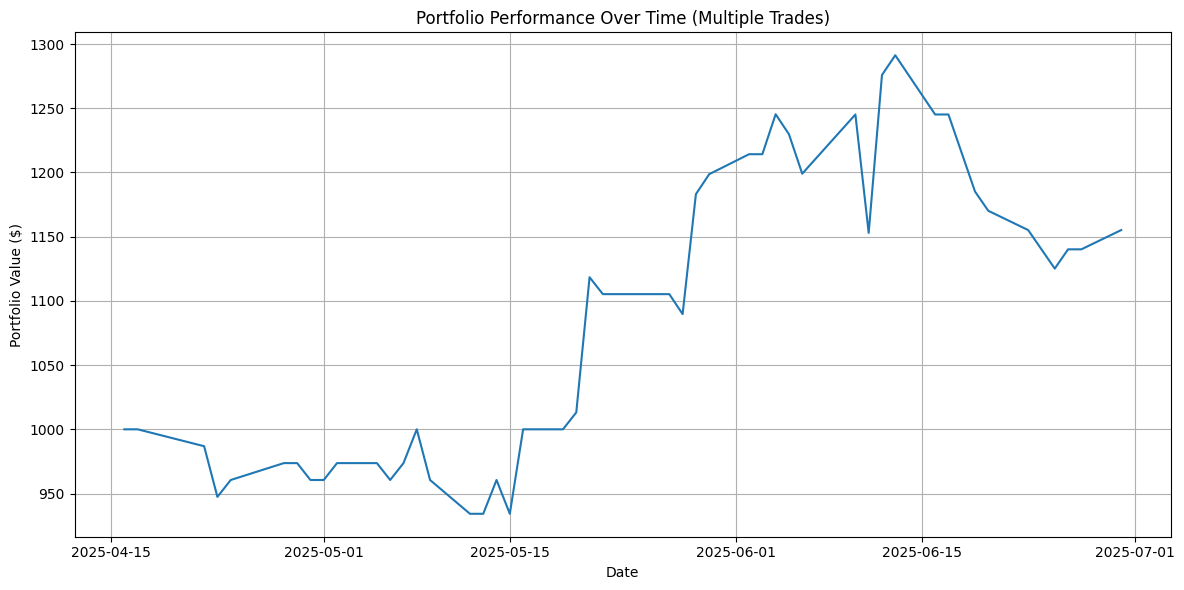

In [135]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], portfolio_value_over_time)
plt.title('Portfolio Performance Over Time (Multiple Trades)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

Generate visualizations and analysis of relevant factors like Price, Volume, and the indicators used in the trading strategy to support the reasonableness of the multiple trade approach by plotting Close Price and Volume with trade signals.



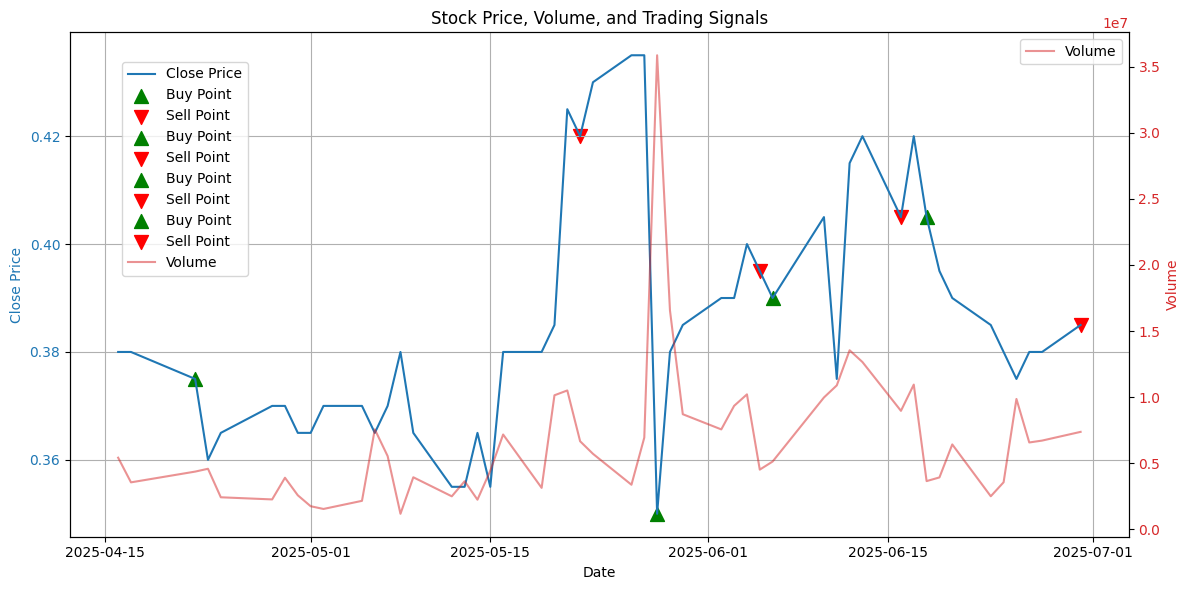

In [136]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(data['Date'], data['Close'], label='Close Price', color='tab:blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(data['Date'], data['Volume'], label='Volume', color='tab:red', alpha=0.5)
ax2.set_ylabel('Volume', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

for trade in multiple_trades:
    buy_date = trade['buy_date']
    sell_date = trade['sell_date']
    # Get the Close price on the buy and sell dates for plotting markers
    buy_price_for_plot = data[data['Date'] == buy_date]['Close'].iloc[0]
    sell_price_for_plot = data[data['Date'] == sell_date]['Close'].iloc[0]

    ax1.scatter(buy_date, buy_price_for_plot, color='green', marker='^', s=100, label='Buy Point' if 'Buy Point' not in plt.legend().get_texts() else "")
    ax1.scatter(sell_date, sell_price_for_plot, color='red', marker='v', s=100, label='Sell Point' if 'Sell Point' not in plt.legend().get_texts() else "")

plt.title('Stock Price, Volume, and Trading Signals')
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.show()